In [71]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")

In [72]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list

tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data


taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [73]:
tree_file <-read_tree("/Users/stephanie.rosales/Documents/omics_projects/Resitada/Tree/MD3_100.nwk.txt")

In [60]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA")) 

In [61]:
meta = meta %>% 
mutate_all(funs(str_replace_all(.,"Placebo", "Homogenate AH"))) %>% 
mutate_all(funs(str_replace_all(.,"Pathogen", "Homogenate DL"))) %>% 
mutate_all(funs(str_replace_all(.,"NH4_Homogenate", "Elevated NH4 + Homogenate")))  %>% 
mutate_all(funs(str_replace_all(.,"Ambient_Homogenate DL", "Ambient + Homogenate DL"))) %>% 
mutate_all(funs(str_replace_all(.,"Ambient_Homogenate AH", "Ambient + Homogenate AH"))) %>% 
mutate_all(funs(str_replace_all(.,"NH4", "Elevated NH4"))) 


In [74]:
ps_pre= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps_pre

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 100 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 100 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 100 tips and 98 internal nodes ]

In [63]:
ps_MD =subset_taxa(ps_pre, Genus==" g__MD3-55" )
ps_MD

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 100 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 100 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 100 tips and 98 internal nodes ]

In [55]:
write.table(tax_table(ps_MD), "/Users/stephanie.rosales/Documents/omics_projects/Resitada/MD3_seqIDs.txt", sep="\t")

In [80]:
write.table(otu_table(ps_MD), "/Users/stephanie.rosales/Documents/omics_projects/Resitada/MD3_ASV.txt", sep="\t")

In [64]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps_pre, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 100 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 100 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 100 tips and 98 internal nodes ]

In [65]:
ps_razor =subset_samples(ps, Type=="Razor")
ps_razor

ps_razor_nr =subset_taxa(ps_razor, Genus!=" g__MD3-55" )
ps_razor_nr

ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped


ps_clip_nr =subset_taxa(ps_Clipped, Genus!=" g__MD3-55" )
ps_clip_nr

ps_clip_ri =subset_taxa(ps_Clipped, Genus==" g__MD3-55" )
ps_clip_ri

ps_neg =subset_samples(ps, Type=="Neg")
ps_neg


ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_unpaired =subset_samples(ps_Clipped, Pairs=="unpaired")
ps_unpaired


#ps_unpaired =subset_samples(ps_Clipped, Pairs=="unpaired")
#ps_unpaired

ps_Am_Pl =subset_samples(ps, Combo=="Ambient + Homogenate AH")
ps_Am_Pl

ps_Am_Pl_c =subset_samples(ps_Clipped, Combo=="Ambient + Homogenate AH")
ps_Am_Pl_c

ps_Am_Pl_r =subset_samples(ps_razor, Combo=="Ambient + Homogenate AH")
ps_Am_Pl_r

ps_placebo =subset_samples(ps_paired, Diseased=="Homogenate AH")
ps_placebo

ps_pathogen =subset_samples(ps_paired, Diseased=="Homogenate DL")
ps_pathogen

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 100 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 100 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 100 tips and 98 internal nodes ]

ERROR: Error in dimnames(x) <- dn: length of 'dimnames' [1] not equal to array extent


In [21]:
ps_fill_razor = filter_taxa(ps_razor, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_razor 
                            
ps_fill_razor_nr = filter_taxa(ps_razor_nr, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_razor_nr                          

ps_fill_clip = filter_taxa(ps_Clipped, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_clip
                           
ps_fill_clip_ri = filter_taxa(ps_clip_ri, function(x) sum(x > 5) > (0.01*length(x)), TRUE)                        
ps_fill_clip_ri
                              
ps_fill_clip_nr = filter_taxa(ps_clip_nr, function(x) sum(x > 5) > (0.001*length(x)), TRUE)
ps_fill_clip_nr                           

ps_fill_neg = filter_taxa(ps_neg, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
ps_fill_neg                         

#ps_fill_homogenate = filter_taxa(ps_homogenate, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
#ps_fill_homogenate

#ps_fill_cells = filter_taxa(ps_cells, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
#ps_fill_cells
 
                           
                           
ps_fill_pair = filter_taxa(ps_paired, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_pair  
                           
ps_fill_unpair = filter_taxa(ps_unpaired, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_unpair    
                             
ps_fill_Am_Pl_c =  filter_taxa(ps_Am_Pl_c, function(x) sum(x > 5) > (0.01*length(x)), TRUE)                           
ps_fill_Am_Pl_c  
                               
ps_fill_Am_Pl_r =  filter_taxa(ps_Am_Pl_r, function(x) sum(x > 5) > (0.01*length(x)), TRUE)                           
ps_fill_Am_Pl_r    
                               
 ps_placebo_fill = filter_taxa(ps_placebo, function(x) sum(x > 10 ) > (0.015*length(x)), TRUE)
    ps_placebo_fill  
                               
                               
 ps_pathogen_fill = filter_taxa(ps_pathogen, function(x) sum(x > 10 ) > (0.015*length(x)), TRUE)
    ps_pathogen_fill                              

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 921 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 921 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 921 tips and 859 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 727 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 727 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 727 tips and 687 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1845 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 1845 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1845 tips and 1561 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 31 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 31 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 31 tips and 26 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5447 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 5447 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5447 tips and 4817 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 212 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 212 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 212 tips and 199 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1594 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 1594 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1594 tips and 1360 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1741 taxa and 56 samples ]
sample_data() Sample Data:       [ 56 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 1741 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1741 tips and 1653 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2022 taxa and 42 samples ]
sample_data() Sample Data:       [ 42 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 2022 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2022 tips and 1939 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 317 taxa and 20 samples ]
sample_data() Sample Data:       [ 20 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 317 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 317 tips and 299 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 592 taxa and 77 samples ]
sample_data() Sample Data:       [ 77 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 592 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 592 tips and 513 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3074 taxa and 58 samples ]
sample_data() Sample Data:       [ 58 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 3074 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 3074 tips and 2697 internal nodes ]

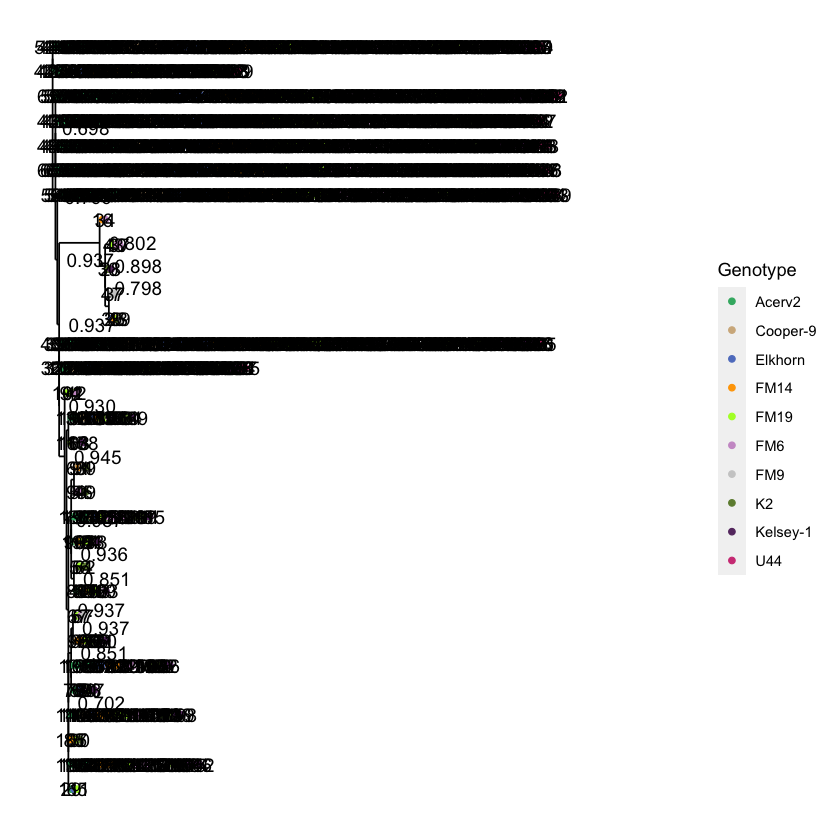

In [79]:
plot_tree(ps_fill_clip_ri, base.spacing=0.05, min.abundance=10, color="Genotype", ladderize="TRUE"
       ) +
scale_color_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B"
                        
                          )) 

In [27]:
?plot_tree

In [ ]:
ps_clip_ri